## Lab02: k-Nearest Neighbors Algorithm implementation

Course: Big data processing

Student: Maryam Ospanova (ML&DS, PhD)
______________________________________________________________________________

Importing modules and attributes:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Description of Global variables:

In [2]:
k = 3   #k-factor of KNN

Loading dataset:

In [3]:
data = datasets.load_iris()
X = data.data[:,:4]            
y = data.target

Preprocessing:

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)   #creation of training and test splits

Description of KNN methods:

In [5]:
class KNN():
    def _init_():
        self.X_train, self.Y_train = []
    
    def fit(self, X_train, Y_train):   #fits the model using X_train as training data and y_train as target values
        self.X_train = X_train
        self.Y_train = Y_train

    def predict(self, X_test, k):      #predicts the class labels for the provided data
        predictions = []
        for instance in X_test:
            predictions.append(self.getNeighborsVote(instance,k))
        return predictions
    
    def euclideanDistance(self, instance1, instance2): #calculates the Euclidean distance between train and test points
        distance = 0.0
        for i in range(len(instance1)-1):
            distance += np.power((instance1[i] - instance2[i]),2)
        distance = np.sqrt(distance)
        return distance

    def getNeighborsVote(self, instance, k):  #finds the k-neighbors of a point
        distances = []   #stores the distances between the considered instance to all train points
        k_labels = []    #stores target values of k-neighbors points
        
        for i in range(len(self.X_train)):
            distances.append((i, self.euclideanDistance(instance, self.X_train[i])))
        distances.sort(key=lambda  distance:distance[1])      #ascending sort by distance values           
        
        for i in range(k):
            k_labels.append(self.Y_train[distances[i][0]])
            
        NeighborsVote = Counter(k_labels).most_common()[0][0] #most frequently encountered input values
        return NeighborsVote

Invoking KNN methods:

In [6]:
model = KNN()
model.fit(X_train, y_train)
y_pred = model.predict(X_test, k)

Evaluation of KNN algorithm:

In [7]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9210526315789473

Confusion matrix:
 [[11  0  0]
 [ 0 12  0]
 [ 0  3 12]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.80      1.00      0.89        12
           2       1.00      0.80      0.89        15

    accuracy                           0.92        38
   macro avg       0.93      0.93      0.93        38
weighted avg       0.94      0.92      0.92        38



Ploting data:

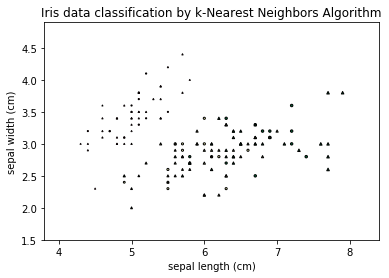

In [8]:
w#Indentifing boundaries of the plot:
x_values = np.arange(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 0.02)
y_values = np.arange(X[:, 1].min()-0.5, X[:, 1].max()+0.5, 0.02)
xx, yy = np.meshgrid(x_values,y_values) #coordinate matrix

plt.figure()
plt.title("Iris data classification by k-Nearest Neighbors Algorithm")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_pred, marker="o", edgecolors="k" , alpha=1, cmap='RdYlGn')
plt.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, marker="^",edgecolors="k", alpha=1, cmap='RdYlGn')